<a href="https://colab.research.google.com/github/Tejal-24/ML_House_Prices_Advanced_Regression/blob/main/HousePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import r2_score

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/Datascience/House Price Prediction/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Datascience/House Price Prediction/test.csv')

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
train.shape

(1460, 81)

In [ ]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [ ]:
null_cols = [col for col in train.columns if train[col].isnull().any()]

In [ ]:
null_cols

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [ ]:
for col in null_cols:
  if train[col].dtypes == object:
    train[col].fillna(train[col].mode()[0], inplace = True)
  elif train[col].dtypes == int or train[col].dtypes == float :
    train[col].fillna(0 , inplace = True)


In [ ]:
null_cols = [col for col in train.columns if train[col].isnull().any()]
null_cols

[]

In [ ]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000


In [ ]:
train = pd.get_dummies(train, drop_first = True)

In [ ]:
def correlation(dataset, threshold):
  col_corr = set()
  corr_mat = dataset.corr()
  for i in range(len(corr_mat.columns)):
    for j in range(i):
      if abs(corr_mat.iloc[i,j]) > threshold and abs(corr_mat.iloc[i,j]) < 1 :
        colname = corr_mat.columns[i]
        col_corr.add(colname)
  return col_corr

correlation(train, 0.7)


{'1stFlrSF',
 'BsmtCond_TA',
 'BsmtFinType2_Unf',
 'BsmtQual_TA',
 'Electrical_Mix',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_TA',
 'Foundation_PConc',
 'GarageArea',
 'GarageCond_TA',
 'GarageQual_TA',
 'GarageType_Detchd',
 'Heating_GasW',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'KitchenQual_TA',
 'MSZoning_RM',
 'MasVnrType_None',
 'MiscFeature_TenC',
 'Neighborhood_Somerst',
 'PoolQC_Gd',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'SaleCondition_Partial',
 'SalePrice',
 'SaleType_WD',
 'TotRmsAbvGrd'}

In [ ]:
train = train.drop(['1stFlrSF','BsmtCond_TA',
 'BsmtFinType2_Unf',
 'BsmtQual_TA',
 'Electrical_Mix',
 'ExterCond_TA',
 'ExterQual_TA',
 'Exterior2nd_CBlock',
 'Exterior2nd_CmentBd',
 'Exterior2nd_HdBoard',
 'Exterior2nd_MetalSd',
 'Exterior2nd_Plywood',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Sdng',
 'FireplaceQu_TA',
 'Foundation_PConc',
 'GarageArea',
 'GarageCond_TA',
 'GarageQual_TA',
 'GarageType_Detchd',
 'Heating_GasW',
 'HouseStyle_1Story',
 'HouseStyle_2Story',
 'KitchenQual_TA',
 'MSZoning_RM',
 'MasVnrType_None',
 'MiscFeature_TenC',
 'Neighborhood_Somerst',
 'PoolQC_Gd',
 'RoofStyle_Hip',
 'RoofStyle_Shed',
 'SaleCondition_Partial',
 'SaleType_WD',
 'TotRmsAbvGrd'], axis = 1)

In [ ]:
train.shape

(1460, 212)

In [ ]:
X = train.drop(['Id','SalePrice'], axis = 1)
y = train['SalePrice']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


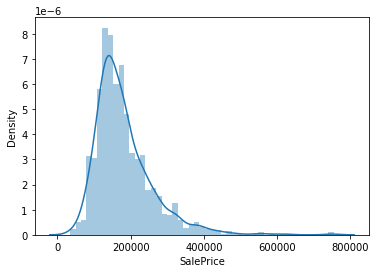

In [ ]:
sns.distplot(y)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)

pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
train_pca = pca.transform(X)
y_log = np.log(y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_pca, y_log, test_size =0.3)


In [ ]:
from sklearn.linear_model import LinearRegression
linReg = LinearRegression()
linReg.fit(X_train, y_train)

linReg_pred = linReg.predict(X_test)
linReg_r2 = r2_score(y_test, linReg_pred)
print("R-square value",linReg_r2)
print('MAE:', metrics.mean_absolute_error(y_test, linReg_pred))
print('MSE:', metrics.mean_squared_error(y_test, linReg_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, linReg_pred)))



R-square value 0.6695767803627285
MAE: 0.1606200371510091
MSE: 0.04700965939301818
RMSE: 0.2168171104710562


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(X_train, y_train)

lasso_pred = lasso.predict(X_test)
lasso_r2 = r2_score(y_test, lasso_pred)
print("R-square value",lasso_r2)
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

R-square value 0.6698277356643546
MAE: 0.16058510948084861
MSE: 0.04697395571800023
RMSE: 0.21673475890590377


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha = 0.01)
ridge.fit(X_train, y_train)

ridge_pred = ridge.predict(X_test)
ridge_r2 = r2_score(y_test, ridge_pred)
print("R-square value",ridge_r2)
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

R-square value 0.6695767803828016
MAE: 0.16062003714627351
MSE: 0.04700965939016237
RMSE: 0.21681711046447041


In [ ]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor(random_state = 1)

RF.fit(X_train,y_train)
Rf_pred = RF.predict(X_test)
RF_r2 = r2_score(y_test, Rf_pred)
print("R-square value",RF_r2)
print('MAE:', metrics.mean_absolute_error(y_test, Rf_pred))
print('MSE:', metrics.mean_squared_error(y_test, Rf_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, Rf_pred)))

R-square value 0.7268510743358961
MAE: 0.14508820454772264
MSE: 0.038861185279698035
RMSE: 0.19713240545303057


In [ ]:
from sklearn import ensemble
GB = ensemble.GradientBoostingRegressor()
GB.fit(X_train, y_train)

GB_pred = GB.predict(X_test)
GB_r2 = r2_score(y_test, GB_pred)
print("R-square value",GB_r2)
print('MAE:', metrics.mean_absolute_error(y_test, GB_pred))
print('MSE:', metrics.mean_squared_error(y_test, GB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GB_pred)))

R-square value 0.7252929740543237
MAE: 0.14840099337779833
MSE: 0.03908285784743495
RMSE: 0.1976938487850215


In [ ]:
paramgrids = {'max_depth' : np.arange(1,10,1),
              'n_estimators': np.arange(0,200,2)}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import ensemble
GB_reg = ensemble.GradientBoostingRegressor()

random = RandomizedSearchCV(GB_reg,  paramgrids, random_state = 1)
random.fit(X_train, y_train) 

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                       criterion='friedman_mse',
                                                       init=None,
                                                       learning_rate=0.1,
                                                       loss='ls', max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                          

In [ ]:
random.best_estimator_

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=4,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=126,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
GB = ensemble.GradientBoostingRegressor(max_depth=4, n_estimators=126,random_state =1)
GB.fit(X_train, y_train)

GB_pred = GB.predict(X_test)
GB_r2 = r2_score(y_test, GB_pred)
print("R-square value",GB_r2)
print('MAE:', metrics.mean_absolute_error(y_test, GB_pred))
print('MSE:', metrics.mean_squared_error(y_test, GB_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, GB_pred)))

R-square value 0.7145796868213338
MAE: 0.15325979250532926
MSE: 0.04060704850315003
RMSE: 0.20151190660392757
